# Twitter Sentiment Analysis

In [1]:
import nltk
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
np.random.seed(1)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Riniperencsik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv("/Users/Riniperencsik/Desktop/Projects/Twitter Sentiment Analysis/twitter_airlines_data.csv", encoding= 'unicode_escape')

In [4]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,NaN,Pacific Time (US & Canada)


In [5]:
for i in data['tweet_location']:
    if i != "NaN" and i != "nan":
        print(i)
data.shape

nan
nan
Lets Play
nan
nan
nan
San Francisco CA
Los Angeles
San Diego
Los Angeles
1/1 loner squad
NYC
NYC
nan
San Francisco, CA
palo alto, ca
west covina
this place called NYC
Somewhere celebrating life. 
Boston | Waltham
nan
nan
Los Angeles
Boston, MA 
714
nan
nan
San Francisco, CA
San Mateo, CA & Las Vegas, NV
Brooklyn
nan
California, San Francisco
Washington DC
nan
Texas
Worldwide
Central Texas
Central Texas
i'm creating a monster 
San Francisco, CA
nan
Iowa City
Los Angeles
Georgia
nan
Los Angeles
Turks and caicos
Oakland via Midwest 
New York, NY
nan
Worldwide
Northern Virginia
Los Angeles / Atlanta
nan
nan
new york, new york
brooklyn, Ny
Bali, Republic of Indonesia
UK, USA. 
Gold Coast, Australia
Stockton, CA
New York, NY
nan
Twin Cities, Minn.
nan
USA
next city
SF  Ó NY
New York, NY
New York + Panama
San Francisco, CA
Los Angeles
London, England
Los Angeles
Floridian from Cincinnati 
Dallas, Texas
USA
Dallas, Texas
nan
nan
nan
Seattle, WA
Los Angeles
nan
nan
Lower Pacific Height

(14640, 15)

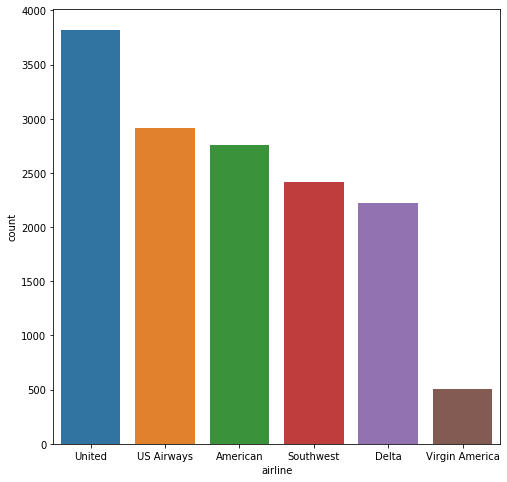

In [6]:
plt.figure(figsize = (8,8))
sns.countplot(x = 'airline', data = data, order = data['airline'].value_counts().index)

The plot above displays the number of mentions on twitter for each airline. We can see that United has the most mentions, followed by US Airways. Virgin America has the least mentions. 

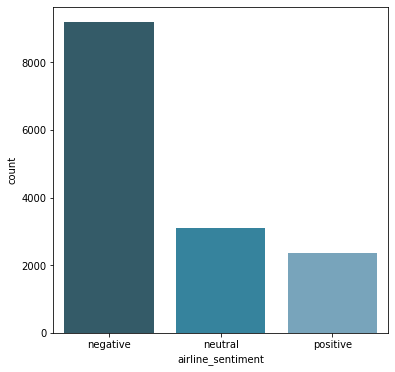

In [7]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'airline_sentiment', data = data, order = data['airline_sentiment'].value_counts().index, palette="PuBuGn_d")

We can see that the tweets are mostly negative, followed by neutral and positive sentiments. 

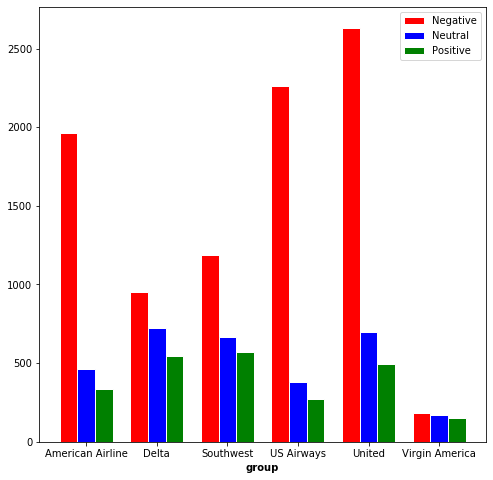

In [8]:
# set width of bar
barWidth = 0.25
 
bars1 = [1960, 955, 1186, 2263, 2633, 181]
bars2 = [463, 723, 664, 381, 697, 171]
bars3 = [336, 544, 570, 269, 492, 152]
 

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

plt.figure(figsize = (8,8))

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Negative')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Neutral')
plt.bar(r3, bars3, color='green', width=barWidth, edgecolor='white', label='Positive')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['American Airline', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

We can see that for all airlines, negative sentiments were most common, followed by neutral then positive. United Airlines has the most negative sentment tweets, followed by US Airways. Virgin America has the smallest number of tweets in general. 

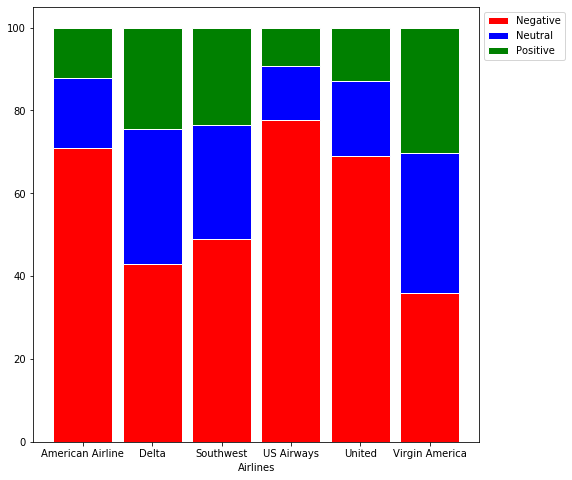

In [9]:
# Data
r = [0,1,2,3,4, 5]
raw_data = {'greenBars': [1960, 955, 1186, 2263, 2633, 181], 'orangeBars': [463, 723, 664, 381, 697, 171],'blueBars': [336, 544, 570, 269, 492, 152]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['greenBars'], df['orangeBars'], df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]

plt.figure(figsize = (8,8))

# plot
barWidth = 0.85
names = ('American Airline', 'Delta', 'Southwest', 'US Airways', 'United', 'Virgin America')
# Create green Bars
plt.bar(r, greenBars, color='red', edgecolor='white', width=barWidth, label="Negative")
# Create orange Bars
plt.bar(r, orangeBars, bottom=greenBars, color='blue', edgecolor='white', width=barWidth, label="Neutral")
# Create blue Bars
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='green', edgecolor='white', width=barWidth, label="Positive")
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Airlines")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# Show graphic
plt.show()

From the percent stacked barplot we can see the proportion of each sentiment type with respect to the airlines. US Airways has the most negative sentiment tweets and also the least amount of positive tweets. On the other hand, Virgin America has the smallest amount of negative tweets and the most positive tweets

In [3]:
#now we will narrow our dataset to only include text and corresponding sentiment variable 
data = data[['airline_sentiment', "text"]]

## Tokenize the data

Since machines cannot process natural language, we need to process the language so that it can be understood more easily by machines. First, we will tokenize the data. Tokenization is essentially the process of breaking down phrases and sentences into smaller, individual unites such as words or phrases known as tokens. 

In [4]:
#separate the tweets based on their sentiment
positive_tweets = list(data[data['airline_sentiment']=='positive']['text'])
negative_tweets = list(data[data['airline_sentiment']=='negative']['text'])
neutral_tweets = list(data[data['airline_sentiment']=='neutral']['text'])

In [ ]:
print('Number of positive tweets: ',len(positive_tweets))
print('Number of negative tweets: ',len(negative_tweets))
print('Number of neutral tweets: ',len(neutral_tweets))

print('\nType of positive_tweets is: ',type(positive_tweets))
print('Type of variable of the text is: ',type(positive_tweets[0]))

In [ ]:
# print positive in greeen
print('\033[92m' +positive_tweets[random.randint(0, 2363)])

# print negative in red
print('\033[91m' + negative_tweets[random.randint(0,9178)])

# print negative in red
print('\033[34m'  + neutral_tweets[random.randint(0,3099)])

Now, we must clean the text and remove unncessary words.

In [8]:
tweet = positive_tweets[11]
print(tweet)

@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Riniperencsik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [9]:
#remove unnecessary words/symbols
print('\033[92m' + tweet)
print('\033[94m')
def remove_unnecessary_text(tweet0):
    # remove old style retweet text "RT"
    tweet1= re.sub(r'^RT[\s]+', '', tweet0)

    # remove hyperlinks
    tweet1 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet1)

    # remove hashtags
    # only removing the hash # sign from the word
    tweet1 = re.sub(r'#', '', tweet1)
    return tweet1

tweet2 = remove_unnecessary_text(tweet)
print(tweet2)

@VirginAmerica I love this graphic. http://t.co/UT5GrRwAaA

@VirginAmerica I love this graphic. 


In [12]:
print('\033[92m')
print('Untokenized string:')
print(tweet2)

def tokenize(tweet0):
    # instantiate tokenizer class, make all characters the same case and remove all twitter mentions (@)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

    # tokenize tweets
    tweet_tokens = tokenizer.tokenize(tweet0)
    
    return tweet_tokens

print('\033[94m')
tweet_tokens = tokenize(tweet2)
print('Tokenized string:')
print(tweet_tokens)


Untokenized string:
@VirginAmerica I love this graphic. 

Tokenized string:
['i', 'love', 'this', 'graphic', '.']


In [10]:
stop_words = stopwords.words('english') #from the stopwords package from nltk.corpus

#print list of enligsh stopwords to be removed
print('Stopwords: ')
print(stop_words)

#print punctuation to be removed
print('\nPunctuation')
print(string.punctuation) #from the string package 

Stopwords: 
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
print('\033[92m')
print('Tweet without stopwords and punctuation removed:')
print(tweet_tokens)

def remove_stopwords_punc(tweet_tokens0):
    clean_tweet = [] #create new list to store clean tweet
    for word in tweet_tokens0:
        if word not in stop_words and word not in string.punctuation: #do not append stopwords or punctuation
            clean_tweet.append(word)
    return clean_tweet
        
clean_tweet = remove_stopwords_punc(tweet_tokens)
print('\033[94m')
print('Clean tweet:')
print(clean_tweet)


Tweet without stopwords and punctuation removed:
['i', 'love', 'this', 'graphic', '.']

Clean tweet:
['love', 'graphic']


In [15]:
#stem words (learning = learn, stopping = stop)

#initiate stemming class from nltk.stem
stemmer = PorterStemmer()

def stem(clean_tweet0):
    #create clean list
    stem_tweet = []

    #stem each word in the list
    for word in clean_tweet0:
        stemmed = stemmer.stem(word)
        stem_tweet.append(stemmed)
    return stem_tweet

In [16]:
def tweet_preprocess(tweet0):
    tweet0 = remove_unnecessary_text(tweet0)
    tweet0 = tokenize(tweet0)
    tweet0 = remove_stopwords_punc(tweet0)
    tweet0 = stem(tweet0)
    return tweet0

In [ ]:
labels = []
for i in range(2363):
    labels.append(0)
    
for i in range(9178):
    labels.append(1)
    
for i in range(3099):
    labels.append(2)
    
print(labels[1:10])
print("Length of labels: ", len(labels))

In [17]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(ys, tweets):
        for word in tweet_preprocess(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [ ]:
tweets = positive_tweets + negative_tweets + neutral_tweets
freqs = build_freqs(tweets, labels)

In [ ]:
# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

print(freqs)

In [ ]:
keys = ['<3', 'entertain', 'outstand', 'easili', 'understand', 'rockstar', 'laugh','bad', 'terrible', 
        'happy', 'womderful', ':(', 'regret', 'resent' ]

totals = []

for word in keys:
    pos = 0 
    neg = 0 
    
    if (word, 1) in freqs:
        neg = freqs[(word, 1)]
    
    if (word, 0) in freqs:
        pos = freqs[(word, 0)]
        
    totals.append([word, pos, neg])
        

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in totals])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in totals]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(totals)):
    ax.annotate(totals[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

We can see from the graph that the current frequency counts of each word does not make much sense since "laugh" and "entertain" are generally associated with positive sentiments. It seems as though a lot more words are negative when we would expect them to be positive. This is because of the class imbalance problem. There are many more negative tweets than there are positive. To solve this problem, oversampling and undersampling will be performed and compared to the original class distribution of the dataset. 

In [ ]:
print('Positive tweets: ',len(positive_tweets))
print('Negative tweets',len(negative_tweets))
print('Neutral tweets',len(neutral_tweets))

In [18]:
#undersample positive and negative class down to positive tweet count: 2363

labels_us = []

#positive
for i in range(2363):
    labels_us.append(0)
    
#negative
for i in range(2363):
    labels_us.append(1)
    
#neutral
for i in range(2363):
    labels_us.append(2)
    
print(labels_us[1:10])

neutral_us = random.sample(neutral_tweets, k=2363)
negative_us = random.sample(negative_tweets, k = 2363)
tweets_us = positive_tweets + negative_us + neutral_us
freqs_us = build_freqs(tweets_us, labels_us)

[0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
keys = ['<3', 'entertain', 'outstand', 'easili', 'understand', 'rockstar', 'laugh','bad', 'terrible', 
        'happy', 'womderful', ':(', 'regret', 'resent' ]

totals_us = []

for word in keys:
    pos = 0 
    neg = 0 
    
    if (word, 1) in freqs_us:
        neg = freqs_us[(word, 1)]
    
    if (word, 0) in freqs:
        pos = freqs_us[(word, 0)]
        
    totals_us.append([word, pos, neg])

In [ ]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in totals_us])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in totals_us]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(totals_us)):
    ax.annotate(totals_us[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

From the graph above, we can see that undersampling helped the problem. Words like "laugh", "easili", and 'entertain' were origically more negative, but now its more positive. 

In [19]:
#80 percent of 2363 is 1891
train_pos = positive_tweets[:1891]
train_neg = negative_us[:1891]
train_neu = neutral_us[:1891]

test_pos = positive_tweets[1891:]
test_neg = negative_us[1891:]
test_neu = neutral_us[1891:]

train = train_pos + train_neg + train_neu
test = test_pos + test_neg + test_neu


train_labels = []

#positive
for i in range(1891):
    train_labels.append(0)
    
#negative
for i in range(1891):
    train_labels.append(1)
    
#neutral
for i in range(1891):
    train_labels.append(2)

test_labels = []

#positive
for i in range(1891, 2363):
    test_labels.append(0)
    
#negative
for i in range(1891, 2363):
    test_labels.append(1)
    
#neutral
for i in range(1891, 2363):
    test_labels.append(2)
    

train_freqs = build_freqs(train, train_labels)
test_freqs = build_freqs(test, test_labels)

In [20]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = tweet_preprocess(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 4)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:
        
        
        if (word, 1) in freqs:
            x[0,1] += freqs[(word, 1)]
        
        # increment the word count for the negative label 0
        if (word, 0) in freqs:
            x[0,2] += freqs[(word, 0)]
            
        #increment the word count for label 2
        if (word, 2) in freqs:
            x[0,3] += freqs[(word,2)]
        
    ### END CODE HERE ###
    assert(x.shape == (1, 4))
    return x

In [ ]:
tmp1 = extract_features(train[26], train_freqs)
print(tmp1)

In [ ]:
tmp2 = extract_features('blorb bleeeeb bloooob', train_freqs)
print(tmp2)

In [21]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train), 4))
for i in range(len(train)):
    X[i, :]= extract_features(train[i], train_freqs)
# training labels corresponding to X
Y = train_labels
print(len(Y))

5673


In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(list(X),list(Y))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# collect the features 'x' and stack them into a matrix 'X'
X_test = np.zeros((len(test), 4))
print(X_test[1])
for i in range(len(test)):
    X_test[i, :]= extract_features(test[i], test_freqs)

print(X_test[1:10])
# training labels corresponding to X
Y_test = test_labels


y_pred=logistic.predict(list(X_test))

[0. 0. 0. 0.]
[[  1.   9.  32.   5.]
 [  1.  31. 276.  43.]
 [  1.  92. 107.  47.]
 [  1.  33.  61.  15.]
 [  1.  21. 254.  32.]
 [  1.  21. 254.  32.]
 [  1.  49.  81.  21.]
 [  1.  12.  21.   8.]
 [  1. 291. 429. 184.]]


Accuracy:  0.635593220338983


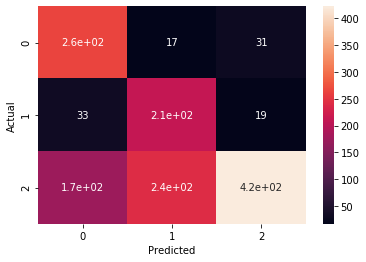

In [24]:
from sklearn import metrics

confusion_matrix = pd.crosstab(np.squeeze(y_pred), np.squeeze(Y_test), rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
print('Accuracy: ',metrics.accuracy_score(np.squeeze(y_pred), np.squeeze(Y_test)))
plt.show()